# Bank Customer Churn Prediction

The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

### About the dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?datasetId=797699&sortBy=voteCount). It contains 10000 rows and 14 columns. The objective of the dataset is to predict whether the customer will leave the bank or not, based on the customer's demographics and financial information included in the dataset.

The dataset has several factors that can influence the customer to leave the bank, which are termed as independent variables. The target variable is the customer's decision to leave the bank, which is termed as dependent variable.

### Data Dictionary
| Column Name | Description |
| --- | --- |
| RowNumber | Row number |
| CustomerId | Unique identification key for different customers |
| Surname | Customer's last name |
| CreditScore | Credit score of the customer |
|Geography | Country of the customer |
|Age | Age of the customer |
|Tenure | Number of years for which the customer has been with the bank |
|Balance | Bank balance of the customer |
|NumOfProducts | Number of bank products the customer is utilising |
|HasCrCard | Binary flag for whether the customer holds a credit card with the bank or not |
|IsActiveMember | Binary flag for whether the customer is an active member with the bank or not |
|EstimatedSalary | Estimated salary of the customer in Dollars |
|Exited | Binary flag 1 if the customer closed account with bank and 0 if the customer is retained |

In [15]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#load dataset
df = pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1. Data Analysis

In [17]:
df.shape

(10000, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
# check for missing values or NaN
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
# check for unique value on each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# 2. Data Preprocessing

##### Dropping the unecessary columns - RowNumber, CustomerId, Surname

In [23]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [25]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [26]:
#check for duplicated value
df.duplicated().sum()

0

##### Renaming the column 'Exited' to 'Churn'

In [27]:
df.rename(columns={'Exited':'Churn'}, inplace=True)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Data Exploration

### 3.1 Distribution of Data

#### Churn Distribution

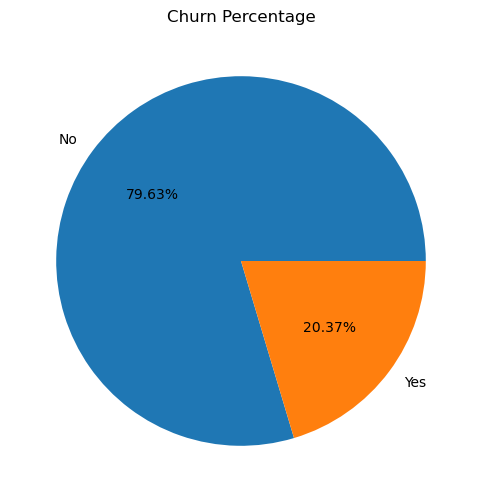

In [30]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

The pie chart clearly visulaizes the customer churn in the dataset. The majority of the customers in the dataset continue to use the serivces of the bank with only 20.4% of the customers churning.

#### Gender Distribution

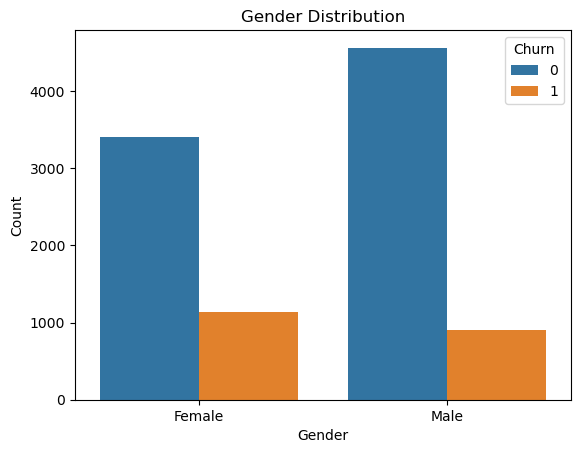

In [33]:
#gender and churn
sns.countplot(x='Gender', data= df, hue='Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

As shown in the graph, majority of the customers are male. But upon looking at the customer churn, we can see that females have more tendency to churn as compared to males. However there is not much difference between the churn count of the two genders so we cannot have a hypothesis regarding the customer churn based on the gender of the customer. 

#### Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

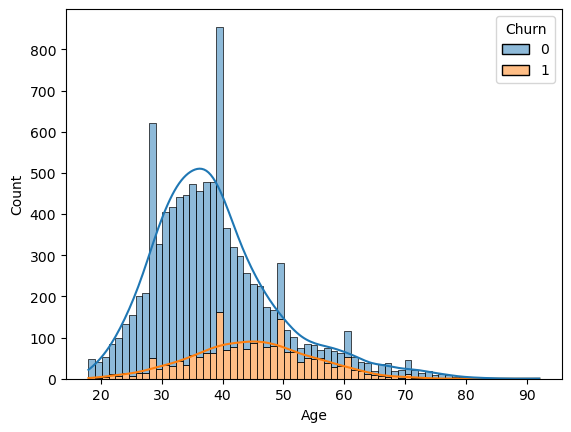

In [37]:
#histogram for age distribution
sns.histplot(x = 'Age', data = df, hue='Churn', multiple='stack', kde=True)

This histtogram visualizes the age distribution and the churn count of the customers. The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

#### Credit Score Distribution

<Axes: xlabel='Churn', ylabel='CreditScore'>

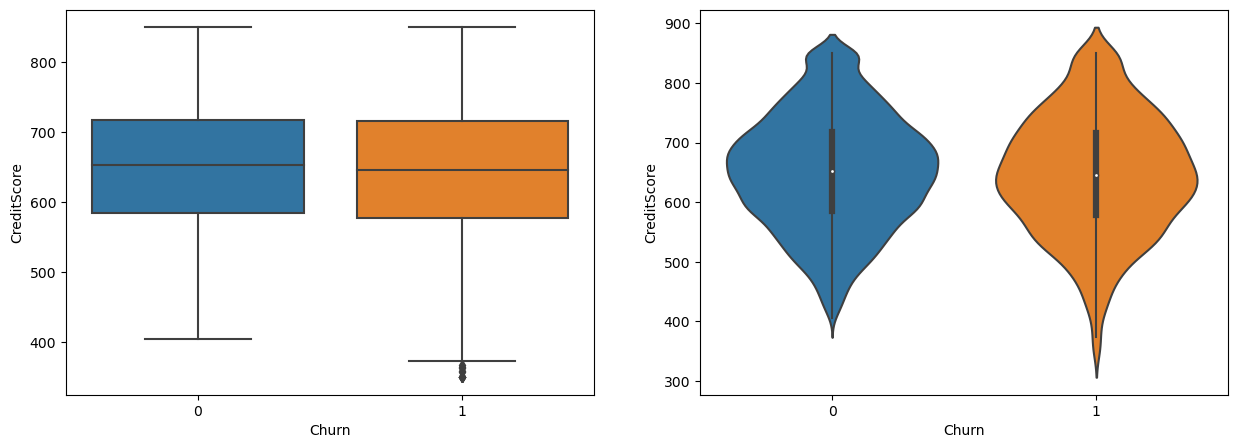

In [40]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[0])
sns.violinplot(x ='Churn' , y = 'CreditScore', data=df ,ax=ax[1])

The boxplot and violinplot shows the distribution of curstomer's credit score along with their churn. In the boxplot, the median of both the churn and non churn customers are almost same. In addition to that, the shape of violinplot is also similar for both the churn and non churn customers. However some churn customers have low credit score, but on the whole, the credit score is not a good indicator of churn.

#### Customer Location Distribution

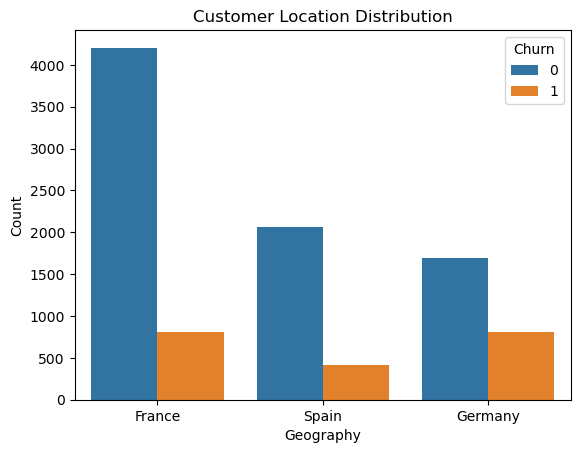

In [41]:
sns.countplot(x='Geography', data= df, hue='Churn')
plt.title('Customer Location Distribution')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

This graphs shows the number of customers from the their repective countries aling with their churn count. Majority of the customers are from France, followed by Spain and Germany. However in contrast to that Germany has the highest number of customer curn followed by France and Spain. From this we can infer that German customers are more likely to churn than the customers from other countries.

#### Tenure Distribution

<Axes: xlabel='Tenure', ylabel='count'>

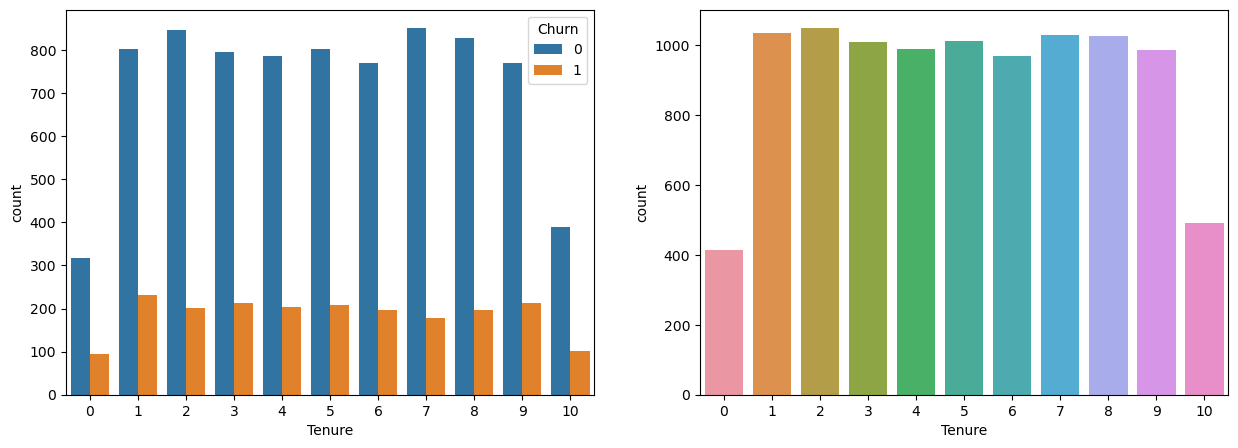

In [51]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df, ax=ax[1])
sns.countplot(x='Tenure', data= df, hue='Churn', ax=ax[0])

Tensure refers to the time (in years) that a customer has been a client of the bank. Majority of the customers in the dataset have a tenure between 1-9 years, having equal distribution among them. There are very few customers with a tenure of less than 1 years or more than 9 years. Looking at the churn of these customers based on their tenure, it can be observed that customers with tenure 1-9 years have higher churn count with maximum in customers with 1 year tenure followed those with 9 year tenure. However customers more than 9 years on tenure counts for the least churn. This is because the customers with higher tenure are more loyal to the bank and less likely to churn.

#### Bank Balance Distribution

<Axes: xlabel='Balance', ylabel='Count'>

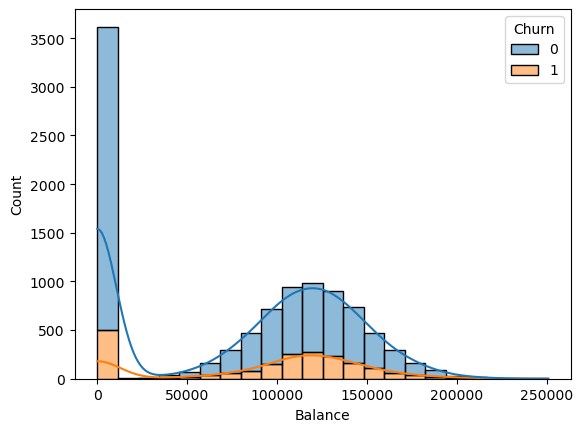

In [53]:
sns.histplot(x = 'Balance', data = df, hue='Churn', multiple='stack', kde=True)

A huge number of customers have zero bank balance which also resulted in them leaving the bank. However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

#### NumOfProducts Distribution

<Axes: xlabel='NumOfProducts', ylabel='count'>

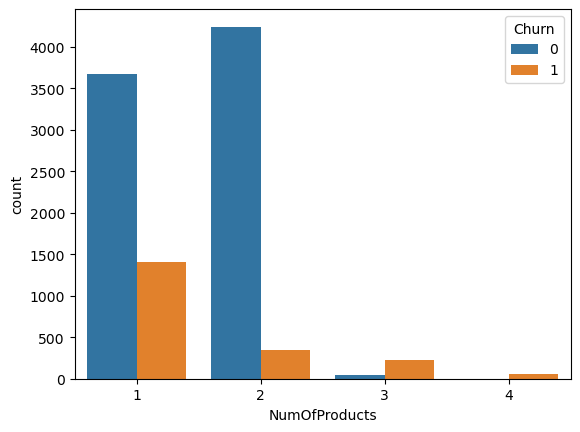

In [54]:
sns.countplot(x='NumOfProducts', data=df, hue='Churn')

In the dataset, we have customers in four categories according to the number of products purchased. The customers with purchase or 1 or 2 products are highest in number and have low churn count in comparison to the non churn customers in the category. However, in the category where customers have purchased 3 or 4 products the number of leaving customers is much higher than the non leaving customers. Therefore, the number of product purchased is a good indicator of customer churn.

#### HasCrCard Distribution

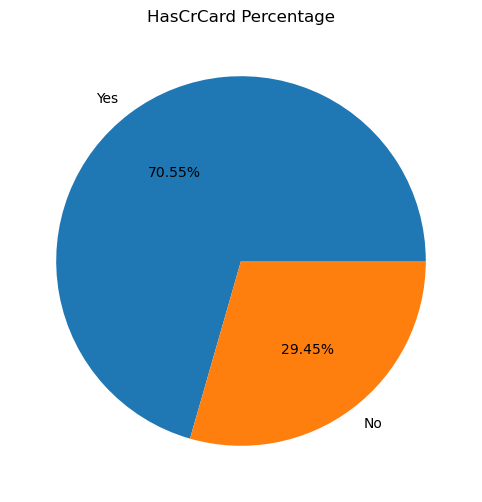

In [63]:

plt.figure(figsize=(10,6))
plt.pie(df['HasCrCard'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('HasCrCard Percentage')
plt.show()

<Axes: xlabel='HasCrCard', ylabel='count'>

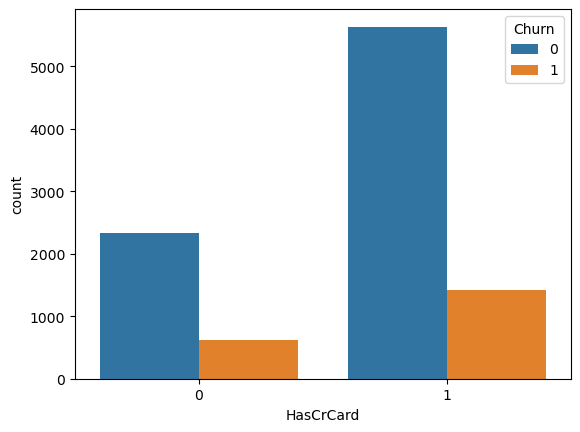

In [59]:
sns.countplot(x='HasCrCard', data=df, hue='Churn')


Majority of the customers have credit cars i.e. nealy 70% of the customers have credit cards leaving 30% of the customers who do not have credit cards. Moreover, the number of customers leaving the bank are more whom have a credit card.

#### IsActiveMember Distribution

<Axes: xlabel='IsActiveMember', ylabel='count'>

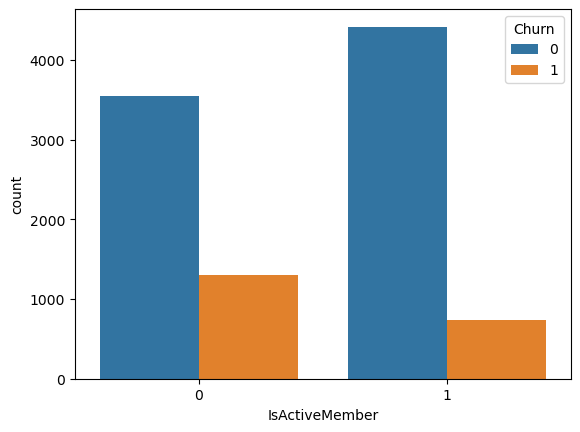

In [64]:
sns.countplot(x='IsActiveMember', hue='Churn', data=df)

As expected, the churn count is higher for non active members as compared to the active members of the bank. This is because the active members are more satisfied with the services of the bank and hence they are less likely to leave the bank. Therefore, the bank should focus on the non active members and try to improve their services to retain them.

#### EstimatedSalary Distribution

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

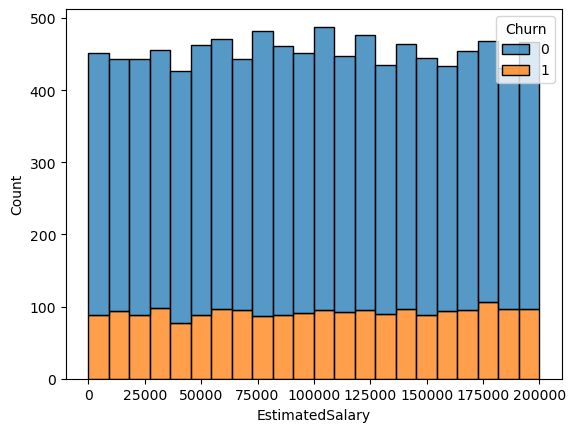

In [66]:
sns.histplot(x = 'EstimatedSalary', data = df, hue='Churn', multiple='stack')

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

# 4. Data Pre-Processing-2

In [67]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Label Encoding

In [68]:
#label encoding for geography and gender
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [69]:
vars = ['Geography', 'Gender']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i,':' ,df[i].unique())

Geography : [0 2 1]
Gender : [0 1]


In [70]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


#### Normalization

In [73]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


## Coorelation Matrix Heatmap

In [76]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [75]:
# using correlation statistical method to find the relation between the churn and other features
df.corr()['Churn'].sort_values(ascending=False)

Churn              1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Churn, dtype: float64

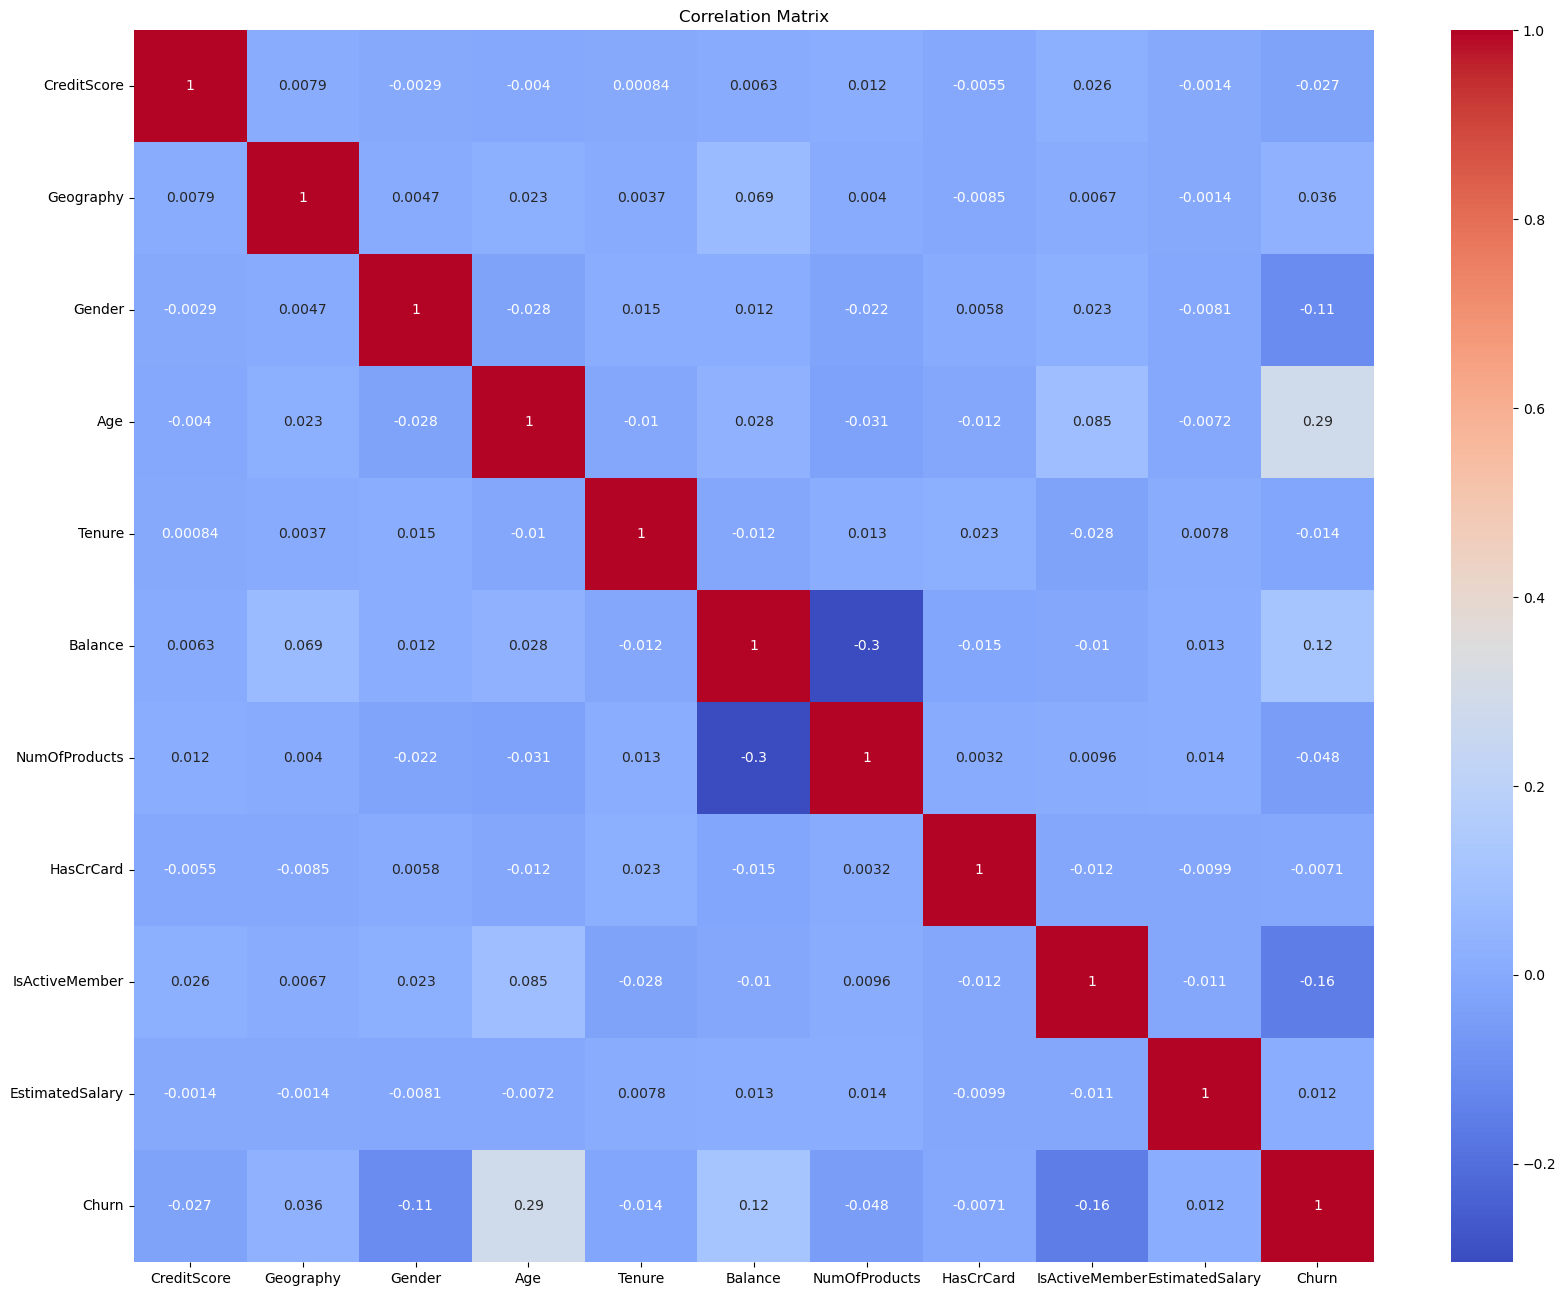

In [78]:
#Correlation Matrix Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

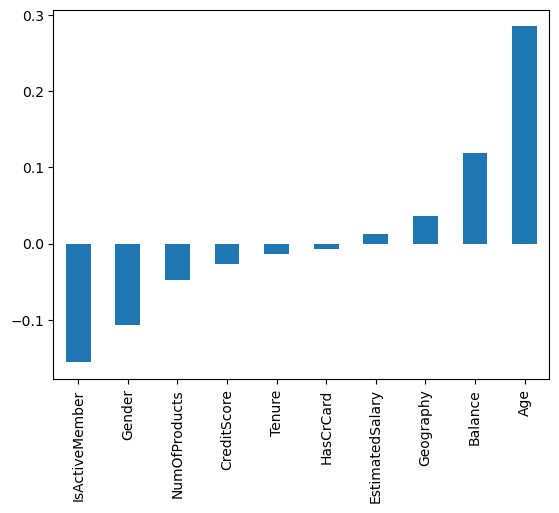

In [79]:
df.corr()['Churn'][:-1].sort_values().plot(kind='bar')

There is no significant coorelation among the variables.

## Train/Test Split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), df['Churn'], test_size=0.3, random_state=42)

## Model Building

### 1. Decision Tree Classifier

Using GridSearchCV to find the best parameters for the model.

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 9, 'random_state': 0}


Add the best parameters to the model

In [82]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0, min_samples_leaf=9)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=9, random_state=0)

In [83]:
#training the model
dtree.fit(X_train, y_train)
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.8582857142857143


### 2. Random Forest Classifier

Using GridSearchCV to find the best parameters for the model.

In [84]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


Add the best parameters to the model

In [85]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8, random_state=0)
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [86]:
#training the model
rfc.fit(X_train, y_train)
#training accuracy
print("Training Accuracy:",rfc.score(X_train,y_train))

Training Accuracy: 0.8767142857142857


## Model Evaluation

### 1. Decision Tree Classifier

Run prediction on test dataset

In [88]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, ..., 0, 0, 0])

Using Confusion matrix heatmap to visualize the model accuracy

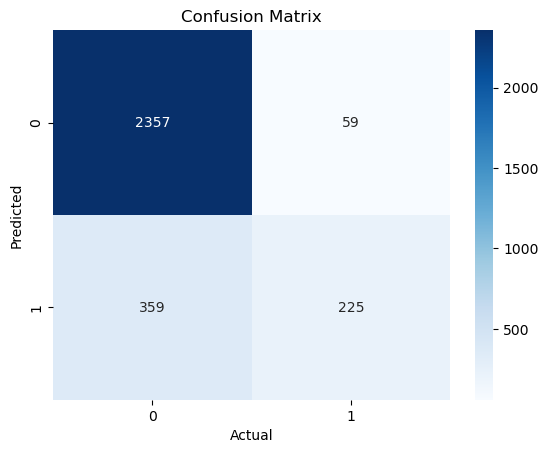

In [89]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Distribution Plot

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_9807/780081781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_9807/780081781.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

Text(0.5, 1.0, 'Actual vs Fitted Values for Customer Churn Prediction')

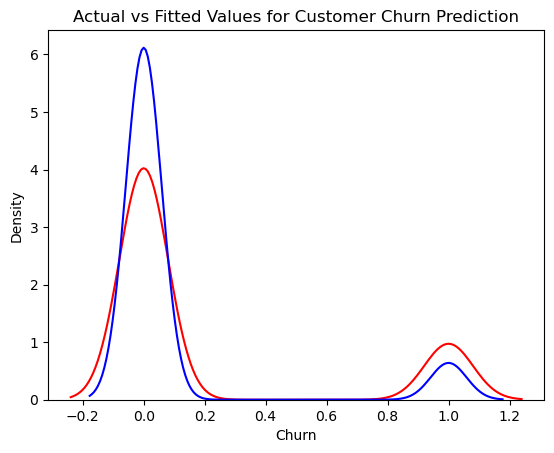

In [90]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Customer Churn Prediction')

The more overlapping of two colors, the more accurate the model is. The actual values are represented with red and the predicted ones with blue. As shown in the graph, the model's prediction are able to follow the curve of actual values but the predicted values are still different from actual ones. Therefore the model is not able to predict the values accurately.

Classification Report

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.79      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [92]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))

Accuracy Score:  0.8606666666666667
Mean Absolute Error:  0.13933333333333334
R2 Score:  0.11123333030935334


r2 Score is a variance score. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a 
 score of 0.0.

### 2. Random Forest Classifier

Run prediction on test dataset

In [93]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0])

Using Confusion matrix heatmap to visualize the model accuracy

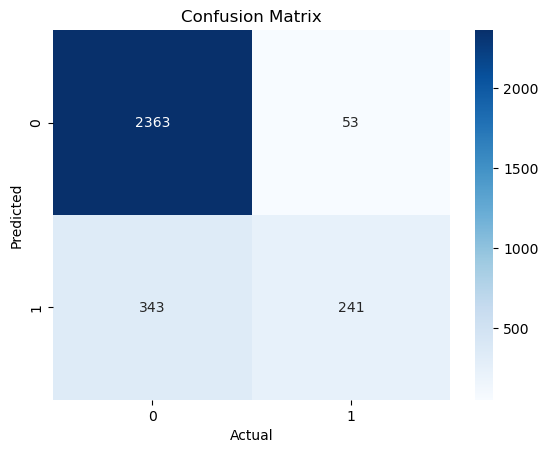

In [94]:
# Using Confusion matrix heatmap to visualize the model accuracy
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Distribution Plot

/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_9807/2321553164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/var/folders/tz/grmj3g9d3n93f7zky79s_tgh0000gn/T/ipykernel_9807/2321553164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

Text(0.5, 1.0, 'Actual vs Fitted Values for Customer Churn Prediction')

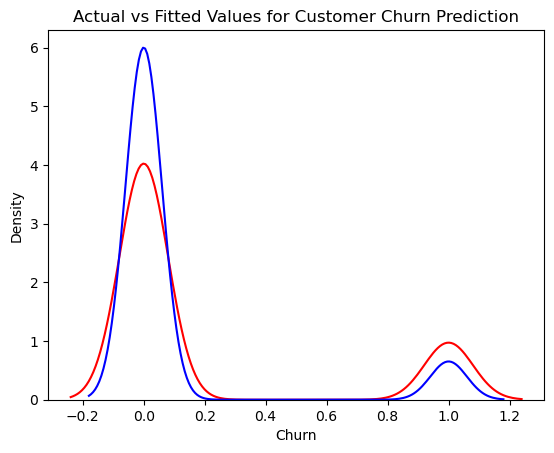

In [95]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Customer Churn Prediction')

Classification Report

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [97]:
print("Accuracy Score: ", accuracy_score(y_test, rfc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

Accuracy Score:  0.868
Mean Absolute Error:  0.132
R2 Score:  0.15801052345096633


## Conclusion
From the exploratory data analysis, I have concluded that the churn count of the customersdepends upon the following factors:
1. Age
2. Geography
3. Tenure
4. Balance
5. Number of Products
6. Has Credit Card
7. Is Active Member

Coming to the classification models, I have used the following models:
1. Decision Tree Classifier
2. Random Forest Classifier

Both the models were hyperparameter tuned using GridSearchCV. Both the models have nearly equal accuracy score. 
But, the Random Forest Classifier has a better accuracy, less RMSE and precision score than the Decision Tree Classifier.